In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [274]:
df=pd.read_csv("all.csv")
df.head()

,Column1,Title,Location,Currency,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood
0,0,Luxury 3 Bedroom Apartment With Excellent Fini...,Off Ligali Ayorinde Victoria Island Lagos,₦,125000000.0,1,1,0,3 beds,3 baths,4 Toilets,Other Victoria Island
1,1,Ultra Luxury 3 Bedroom Apartment,Victoria Island Victoria Island Extension Vict...,₦,180000000.0,1,1,0,3 beds,4 baths,4 Toilets,Victoria Island Extension
2,2,Luxury 2 Bedrooms Apartment With Bq,Victoria Island Victoria Island Extension Vict...,₦,120000000.0,1,1,0,2 beds,4 baths,3 Toilets,Victoria Island Extension
3,3,Brand New Specious Luxury 6 Bedroom Fully Deta...,Victoria Island Adeola Odeku Victoria Island L...,₦,590000000.0,0,1,0,6 beds,6 baths,7 Toilets,Waziri Adeola Odeku
4,4,Exquisite 3bedroom Apartment,Oniru Victoria Island Lagos,₦,150000000.0,0,1,0,3 beds,3 baths,4 Toilets,Oniru


In [275]:
# checking the currencies that we have here 
df['Currency'].unique()

array(['₦', '$'], dtype=object)

In [276]:
df=df.drop(["Column1","Title","Location"],axis="columns")
df.head()

,Currency,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood
0,₦,125000000.0,1,1,0,3 beds,3 baths,4 Toilets,Other Victoria Island
1,₦,180000000.0,1,1,0,3 beds,4 baths,4 Toilets,Victoria Island Extension
2,₦,120000000.0,1,1,0,2 beds,4 baths,3 Toilets,Victoria Island Extension
3,₦,590000000.0,0,1,0,6 beds,6 baths,7 Toilets,Waziri Adeola Odeku
4,₦,150000000.0,0,1,0,3 beds,3 baths,4 Toilets,Oniru


In [277]:
# To get the number of bedrooms, bathrooms and toilets only
df.Bedrooms =pd.to_numeric(df['Bedrooms'].str[:1], errors='coerce')
df.Bathrooms =pd.to_numeric(df['Bathrooms'].str[:1], errors='coerce')
df.Toilets =pd.to_numeric(df['Toilets'].str[:1], errors='coerce')

df

,Currency,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood
0,₦,125000000.0,1,1,0,3.0,3.0,4.0,Other Victoria Island
1,₦,180000000.0,1,1,0,3.0,4.0,4.0,Victoria Island Extension
2,₦,120000000.0,1,1,0,2.0,4.0,3.0,Victoria Island Extension
3,₦,590000000.0,0,1,0,6.0,6.0,7.0,Waziri Adeola Odeku
4,₦,150000000.0,0,1,0,3.0,3.0,4.0,Oniru
...,...,...,...,...,...,...,...,...,...
66378,₦,170000000.0,0,0,0,0.0,0.0,0.0,Other Lekki
66379,₦,170000000.0,0,0,0,5.0,5.0,6.0,Other Lekki
66380,₦,160000000.0,0,0,0,5.0,5.0,5.0,Other Lekki
66381,₦,42000000.0,0,0,0,2.0,2.0,2.0,Other Lekki


the avarage convertion rate in whole of 2022 is 
$1 = 423.9 NGN

In [278]:
# converting all the columns to naira only
for index,row in df.iterrows():
    if row['Currency'] =='$':
        amt=row['Price']*423.9
    else:
        amt=row['Price']
    print(amt) 

125000000.0
180000000.0
120000000.0
590000000.0
150000000.0
95000000.0
80000000.0
160000000.0
160000000.0
220000000.0
500000000.0
280000000.0
170000000.0
250000000.0
190000000.0
160000000.0
7000000000.0
120000000.0
95000000.0
185000000.0
200000000.0
170000000.0
200000000.0
170000000.0
165000000.0
110000000.0
200000000.0
135000000.0
150000000.0
1500000000.0
150000000.0
300000000.0
120000000.0
170000000.0
550005000.0
140000000.0
700000000.0
350000000.0
190000000.0
180000000.0
130000000.0
300000000.0
270000000.0
190000000.0
87000000.0
300000000.0
370912500.0
95000000.0
95000000.0
95000000.0
87000000.0
1400000000.0
250000000.0
300969000.0
137000000.0
1400000000.0
150000000.0
200000000.0
650000000.0
80000000.0
120000000.0
140000000.0
6000000000.0
150000000.0
95000000.0
370000000.0
265000000.0
1400000000.0
140000000.0
3000000000.0
180000000.0
270000000.0
300000000.0
150000000.0
1300000000.0
1500000000.0
120000000.0
230000000.0
12717000000.0
7000000000.0
4500000000.0
80000000.0
150000000.0
30

In [279]:
# try to assign the amt to df.Amount and check if it will work 
# df['Amount']=amt
# df.head()
# it didn't work

In [280]:
df['Amount']=[row['Price']*423.9 if row['Currency'] =='$' else row['Price'] for index,row in df.iterrows()]

In [281]:
df['Amount']=round(df['Amount'])
df.head()

,Currency,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood,Amount
0,₦,125000000.0,1,1,0,3.0,3.0,4.0,Other Victoria Island,125000000.0
1,₦,180000000.0,1,1,0,3.0,4.0,4.0,Victoria Island Extension,180000000.0
2,₦,120000000.0,1,1,0,2.0,4.0,3.0,Victoria Island Extension,120000000.0
3,₦,590000000.0,0,1,0,6.0,6.0,7.0,Waziri Adeola Odeku,590000000.0
4,₦,150000000.0,0,1,0,3.0,3.0,4.0,Oniru,150000000.0


In [282]:
# To check for outliers [houses can't have more than 2 bathroom or toilet than the bedroom]
outlier=df[(df.Bathrooms>df.Bedrooms+2) | (df.Toilets>df.Bedrooms+2)]
outlier

,Currency,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood,Amount
677,₦,1.600000e+12,0,1,1,0.0,7.0,0.0,Waziri Adeola Odeku,1.600000e+12
1034,₦,7.000000e+08,0,0,1,4.0,8.0,8.0,Oniru,7.000000e+08
1055,₦,1.400000e+09,0,0,0,1.0,8.0,9.0,Other Victoria Island,1.400000e+09
1105,₦,1.300000e+08,0,0,1,3.0,5.0,6.0,Oniru,1.300000e+08
2036,₦,1.850000e+09,0,1,0,4.0,5.0,7.0,Oniru,1.850000e+09
...,...,...,...,...,...,...,...,...,...,...
63838,₦,6.500000e+07,0,0,0,0.0,4.0,5.0,Osapa London,6.500000e+07
64339,₦,2.100000e+08,0,0,0,5.0,8.0,8.0,Chevron,2.100000e+08
64921,₦,8.000000e+08,0,0,0,1.0,1.0,9.0,Chevron,8.000000e+08
65215,₦,1.380000e+08,0,0,0,4.0,6.0,7.0,Osapa London,1.380000e+08


In [283]:
df.shape

(66383, 10)

In [284]:
df['Toilets']=pd.to_numeric(df['Toilets'])
df['Bathrooms']=pd.to_numeric(df['Bathrooms'])
df['Bedrooms']=pd.to_numeric(df['Bedrooms'])

# this will create many nan values

In [285]:
# the nan values are changed to zero 
df['Toilets']=df['Toilets'].fillna(0)
df['Bathrooms']=df['Bathrooms'].fillna(0)

In [286]:
# houses of these days have a toilet or bathroom ahead of the rooms, the visitors toilet 
df_new=df[~((df.Bathrooms>(df.Bedrooms+1)) | (df.Toilets>(df.Bedrooms+1)))]
df_new

,Currency,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood,Amount
0,₦,125000000.0,1,1,0,3.0,3.0,4.0,Other Victoria Island,125000000.0
1,₦,180000000.0,1,1,0,3.0,4.0,4.0,Victoria Island Extension,180000000.0
3,₦,590000000.0,0,1,0,6.0,6.0,7.0,Waziri Adeola Odeku,590000000.0
4,₦,150000000.0,0,1,0,3.0,3.0,4.0,Oniru,150000000.0
5,₦,95000000.0,1,0,0,2.0,1.0,2.0,Other Victoria Island,95000000.0
...,...,...,...,...,...,...,...,...,...,...
66378,₦,170000000.0,0,0,0,0.0,0.0,0.0,Other Lekki,170000000.0
66379,₦,170000000.0,0,0,0,5.0,5.0,6.0,Other Lekki,170000000.0
66380,₦,160000000.0,0,0,0,5.0,5.0,5.0,Other Lekki,160000000.0
66381,₦,42000000.0,0,0,0,2.0,2.0,2.0,Other Lekki,42000000.0


there are abnormalities from the above code

In [287]:
# Dropping currency and price columns 
df_new=df_new.drop(['Currency','Price'],axis=1)
df_new.head()

,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood,Amount
0,1,1,0,3.0,3.0,4.0,Other Victoria Island,125000000.0
1,1,1,0,3.0,4.0,4.0,Victoria Island Extension,180000000.0
3,0,1,0,6.0,6.0,7.0,Waziri Adeola Odeku,590000000.0
4,0,1,0,3.0,3.0,4.0,Oniru,150000000.0
5,1,0,0,2.0,1.0,2.0,Other Victoria Island,95000000.0


In [288]:
Neighborhood_Count = df_new.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)
Neighborhood_Count

Neighborhood
Other Lekki                  8425
Lekki Phase 1                7298
Chevron                      7148
Ikota                        6036
Ikate                        5145
Osapa London                 4287
Other Ikoyi                  3145
Banana Island                2754
Other Victoria Island        2107
Lekki Phase 2                2007
GRA                          1826
Old Ikoyi                    1581
Oniru                        1572
Agungi                       1529
Other Ikeja                  1236
Ologolo                      1198
Victoria Garden City         1169
Adeniyi Jones                 835
Opebi                         632
Parkview                      620
Foreshore                     558
Allen Avenue                  497
Victoria Island Extension     483
Onikoyi                       363
Awolowo Way                   362
Oregun                        298
Alausa                        224
Waziri Adeola Odeku           206
Airport Road                  160
A

In [289]:
# Total Neighborhood in the data set
len(Neighborhood_Count)

32

In [290]:
df.describe()

,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Amount
count,6.591700e+04,66383.000000,66383.000000,66383.000000,61178.000000,66383.000000,66383.000000,6.591700e+04
mean,5.955080e+09,0.123782,0.359957,0.077942,3.230344,2.716298,3.084826,6.392617e+09
std,7.730007e+11,0.329335,0.479991,0.268082,1.939504,2.280852,2.591600,7.734744e+11
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,6.300000e+07,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,6.500000e+07
50%,1.100000e+08,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,1.100000e+08
75%,2.300000e+08,0.000000,1.000000,0.000000,5.000000,5.000000,5.000000,2.450000e+08
max,1.400000e+14,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,1.400000e+14


**Cleaning of the data**

In [291]:
# checking the columns that have the nan values
df_new.columns[df_new.isna().any()]

Index(['Bedrooms', 'Amount'], dtype='object')

In [292]:
# Calculate the percentage of NaN values in each column
percent_nan = (df_new.isna().sum() / df_new.shape[0]) * 100
percent_nan

Serviced        0.000000
Newly Built     0.000000
Furnished       0.000000
Bedrooms        8.118225
Bathrooms       0.000000
Toilets         0.000000
Neighborhood    0.000000
Amount          0.697185
dtype: float64

In [293]:
# from the above, the missing value is very small. i will remove it.
df_new=df_new.dropna()

In [294]:
# Removing the zero bedroom and Amount 
df_new = df_new[(df_new['Amount'] != 0.0) & (df_new['Bedrooms'] != 0.0)]

In [295]:
# reset the index column
df_new=df_new.reset_index(drop=True)
df_new

,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Neighborhood,Amount
0,1,1,0,3.0,3.0,4.0,Other Victoria Island,125000000.0
1,1,1,0,3.0,4.0,4.0,Victoria Island Extension,180000000.0
2,0,1,0,6.0,6.0,7.0,Waziri Adeola Odeku,590000000.0
3,0,1,0,3.0,3.0,4.0,Oniru,150000000.0
4,1,0,0,2.0,1.0,2.0,Other Victoria Island,95000000.0
...,...,...,...,...,...,...,...,...
45200,0,0,0,5.0,5.0,6.0,Other Lekki,50000000.0
45201,0,0,0,5.0,5.0,6.0,Other Lekki,170000000.0
45202,0,0,0,5.0,5.0,5.0,Other Lekki,160000000.0
45203,0,0,0,2.0,2.0,2.0,Other Lekki,42000000.0


Text(0.5, 1.0, 'Chat of Bathrooms')

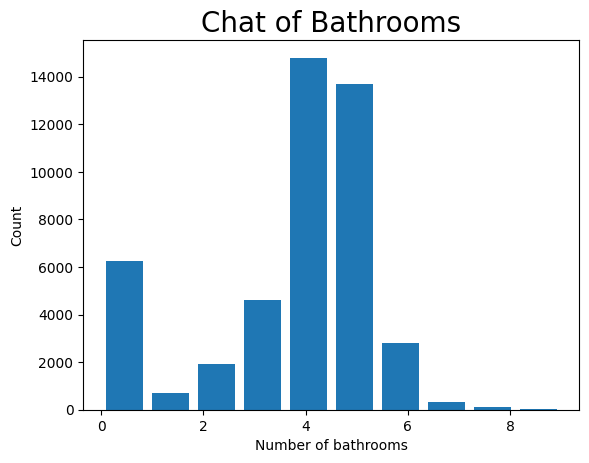

In [296]:
plt.hist(df_new.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.title('Chat of Bathrooms',size=20)

Text(0.5, 1.0, 'Chat of Bathrooms')

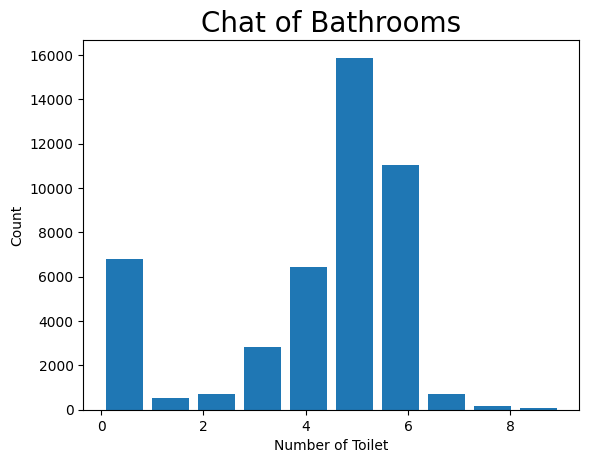

In [297]:
plt.hist(df_new.Toilets,rwidth=0.8)
plt.xlabel("Number of Toilet")
plt.ylabel("Count")
plt.title('Chat of Bathrooms',size=20)

Text(0.5, 1.0, 'Chat of Bathrooms')

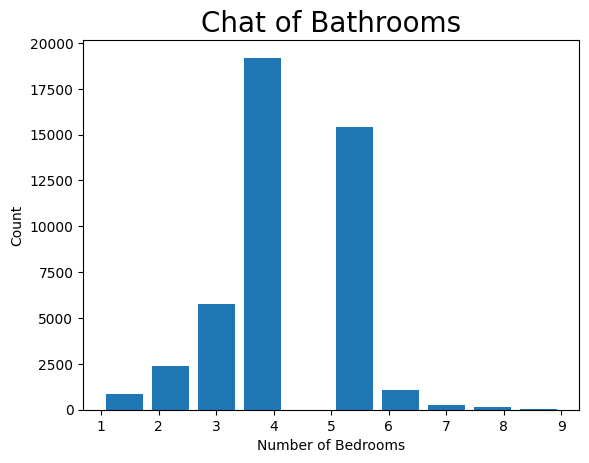

In [298]:
plt.hist(df_new.Bedrooms,rwidth=0.8)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title('Chat of Bathrooms',size=20)

In [299]:
dummies=pd.get_dummies(df_new.Neighborhood).astype(int)
dummies.head(3)

,Adeniyi Jones,Agidingbi,Agungi,Airport Road,Alausa,Allen Avenue,Awolowo Way,Banana Island,Chevron,Foreshore,...,Oregun,Osapa London,Other Ikeja,Other Ikoyi,Other Lekki,Other Victoria Island,Parkview,Victoria Garden City,Victoria Island Extension,Waziri Adeola Odeku
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [300]:
# df_new=pd.concat([df_new.drop('Neighborhood',axis=1),dummies.drop('Agungi',axis=1)],axis=1)
df_new=pd.concat([df_new.drop('Neighborhood',axis=1),dummies],axis=1)
df_new.head(4)

,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,Amount,Adeniyi Jones,Agidingbi,Agungi,...,Oregun,Osapa London,Other Ikeja,Other Ikoyi,Other Lekki,Other Victoria Island,Parkview,Victoria Garden City,Victoria Island Extension,Waziri Adeola Odeku
0,1,1,0,3.0,3.0,4.0,125000000.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,3.0,4.0,4.0,180000000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,6.0,6.0,7.0,590000000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,3.0,3.0,4.0,150000000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


BUILDING MODEL FOR THE PREDICTION

In [301]:
# getting my x and y from the cleaned dataset
x=df_new.drop('Amount',axis=1)
y=df_new['Amount']

In [302]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [303]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

-0.17405587810477097

In [304]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=7,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([-0.44037153, -1.69994768, -0.69837052, -0.22190983, -0.16021226,
       -0.14028101, -0.13465615])

In [305]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos={
        'Linear_Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept' :[True,False]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'Decision_Tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    } 

    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.084e+27, tolerance: 1.967e+24
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+27, tolerance: 1.967e+24
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

,model,best_score,best_params
0,Linear_Regression,-0.644116,{'fit_intercept': False}
1,Lasso,-0.644116,"{'alpha': 2, 'selection': 'random'}"
2,Decision_Tree,-125.040104,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [306]:

cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)
model = LinearRegression()
scores = cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error')

print("Cross-validation scores (negative MSE):", scores)
print("Mean cross-validation score:", np.mean(scores))

# Fit the model on the entire dataset
model.fit(x, y)
model.score(x_test,y_test)

Cross-validation scores (negative MSE): [-9.08694827e+20 -4.56215497e+20 -6.73929518e+20 -1.46810922e+21
 -2.30907560e+21 -2.26725945e+21 -2.36367120e+21]
Mean cross-validation score: -1.492422187260282e+21


-0.10774935517211803

In [307]:
np.where(x.columns=='Lekki Phase 1')[0][0]

19

I am using the model for my model because it gave me the best model from all i have prepared

In [308]:
def predict_price(neighborhood,service,newBuilding,furnish,bed,bath,toilet):
    loc_index=np.where(x.columns==neighborhood)[0][0]   # To get the column number in the x dataset 
 
    n=np.zeros(len(x.columns))
    n[0]=service
    n[1]=newBuilding
    n[2]=furnish
    n[3]=bed    
    n[4]=bath
    n[5]=toilet
    if loc_index >= 0:
        n[loc_index]=1

    return round(model.predict([n])[0])

In [309]:
predict_price('Other Victoria Island',0,0,0,3,3,1)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


14022148096

In [310]:
# To save the train model 
import pickle
with open('lagosHousing_2022.pickle','wb') as f:
    pickle.dump(model,f)

In [311]:
import json
columns = {
    'columns': list(df.Neighborhood)
}

# Write the column names to a JSON file
with open('hood.json', 'w') as f:
    json.dump(columns, f, indent=4)

print("Neighborhood names have been written to hood.json")

Neighborhood names have been written to hood.json


In [312]:
x.to_csv('x_data.csv', index=False)
print("Data exported to x_data.csv")

Data exported to x_data.csv
